<a target="_blank" href="https://colab.research.google.com/github/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/98_1_all_edu.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Upstage Solar Full Stack LLM 101
## Code to Understand!
![Overview](./figures/overview.png)


### Table of Contents
* <b> Session 1. Hello Solar </b> : Obtain an Upstage API Key and use the upstage chat model. <br>
    - 1-1 Interacting with the Solar-1-mini-chat Model
    - 1-2 Using Few-Shot Examples in Chat Completions


- <b> Session 2. Building LLM Applications with LangChain</b> :  Learn how to easily implement LLM chains using LangChain and understand the features of LLMs.<br>
    - 2-1 Prompt Engineering
    - 2-2 Hallucinations
    - 2-3 Groundedness Check with LangChain and Upstage


- <b> Session 3. What is RAG? </b>:  Understand the concept of RAG, load documents, and implement a RAG system.<br>
    - 3-1 Layout Analysis
    - 3-2 Retrieval Augmented Generation (RAG) for Question Answering
    - 3-3 RAG Limitations <br>


- <b> Session 4. Efficient Text Splitting and Indexing with LangChain </b>:  Efficiently build a RAG system by loading external documents, splitting them into smaller chunks, using embedding APIs to store them in a vectorspace, and retrieving them.<br>

- <b> Session 5. Gradio </b>: Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

In [2]:
!pip3 install -qU guardrails-ai openai langchain_community langchain_experimental langchain-upstage sentence-transformers langchainhub langchain-chroma langchain matplotlib python-dotenv tavily-python ragas faiss-cpu tokenizers getpass4
!pip3 install -q arize-phoenix[evals]

zsh:1: no matches found: arize-phoenix[evals]


## [Session 1] HELLO SOLAR

  
<b> Introduction to Solar Framework </b>: Learn the basics of setting up the Solar LLM framework and running a simple "Hello, World!" example to understand its core functionality.  

#### UPSTAGE_API_KEY
To obtain your Upstage API key, follow these steps:

1. Visit the Upstage AI console at <https://console.upstage.ai>.
2. Sign up for an account if you don't already have one.
3. Log in to your account.
4. Navigate to the API key section.
5. Generate your API key.
6. Copy the key and save it securely.

![Console](./figures/console.upstage.ai.jpg)

In [3]:
%load_ext dotenv
%dotenv
# UPSTAGE_API_KEY from https://console.upstage.ai/

In [4]:
import os
import getpass
import warnings

warnings.filterwarnings("ignore")

In [5]:
# @title set API key
import os
import getpass
from pprint import pprint
import warnings

warnings.filterwarnings("ignore")

from IPython import get_ipython

if "google.colab" in str(get_ipython()):
    # Running in Google Colab. Please set the UPSTAGE_API_KEY in the Colab Secrets
    from google.colab import userdata
    os.environ["UPSTAGE_API_KEY"] = userdata.get("UPSTAGE_API_KEY")
else:
    # Running locally. Please set the UPSTAGE_API_KEY in the .env file
    from dotenv import load_dotenv

    load_dotenv()

if "UPSTAGE_API_KEY" not in os.environ:
    os.environ["UPSTAGE_API_KEY"] = getpass.getpass("Enter your Upstage API key: ")


####  1-1 Interacting with the Solar-1-mini-chat Model

This Python code demonstrates how to use the OpenAI API to interact with the Solar-1-mini-chat model provided by Upstage AI.

##### Steps

1. Import necessary libraries: `os`, `openai`, and `pprint`.
2. Set up the OpenAI client with the API key and base URL.
3. Create a chat completion request using `client.chat.completions.create()`.
   - Specify the model: "solar-1-mini-chat".
   - Provide a list of messages, including the system message and user message.
4. Handle the model's response:
   - Print the entire response using `pprint()`.
   - Print the content of the assistant's message using `response.choices[0].message.content`.

In [6]:
import os
from openai import OpenAI
from pprint import pprint

client = OpenAI(
    api_key=os.environ["UPSTAGE_API_KEY"], base_url="https://api.upstage.ai/v1/solar"
)
chat_result = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What about Korea?"},
    ],
)
pprint(chat_result)
print("Message only:")
pprint(chat_result.choices[0].message.content)

ChatCompletion(id='6e6780a3-7314-400a-a982-df24b4ad5eb4', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Korea, also known as the Republic of Korea (ROK), is a country located on the Korean Peninsula in East Asia. It is bordered by China to the west and North Korea to the north. The capital and largest city is Seoul. Korea has a rich history, with a long-standing tradition of martial arts.\n\nThe traditional martial art of Korea is called Taekwondo, which is known for its high, fast, and spinning kicks. It is also characterized by fast kicking, jumping, and spinning techniques. Taekwondo is one of the most practiced martial arts in the world and is the national sport of Korea.\n\nAnother popular martial art from Korea is Hapkido, which emphasizes joint locks, throws, and grappling techniques, along with kicking and punching. It is known for its fluid movements and focus on circular striking techniques.\n\nKorea also has a long histo

#### 1-2 Using Few-Shot Examples in Chat Completions

This Python code demonstrates how to use few-shot examples in the OpenAI Chat Completions API to provide context and guide the model's responses.

##### Steps

1. Set up the OpenAI client with the API key and base URL.
2. Create a chat completion request using `client.chat.completions.create()`.
   - Specify the model: "solar-1-mini-chat".
   - Provide a list of messages, including:
     - System message: Defines the assistant's role.
     - Few-shot examples: Provide context and desired behavior.
     - User input: The actual user query.
3. Handle the model's response:
   - Print the entire response using `pprint()`.
   - Print the content of the assistant's message using `response.choices[0].message.content`.

In [7]:
# few shots: examples or history
chat_result = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        # examples
        {"role": "user", "content": "What is the capital of France?"},
        {
            "role": "assistant",
            "content": "I know of it. It's Paris!!",
        },
        # user input
        {"role": "user", "content": "What about Korea?"},
    ],
)
pprint(chat_result)
print("Message only:")
pprint(chat_result.choices[0].message.content)

ChatCompletion(id='6ede28d1-441a-4de1-bd21-1d4d84e52c32', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The capital of South Korea is Seoul, while the capital of North Korea is Pyongyang.', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1727164284, model='solar-1-mini-chat-240612', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=21, prompt_tokens=55, total_tokens=76, completion_tokens_details=None))
Message only:
('The capital of South Korea is Seoul, while the capital of North Korea is '
 'Pyongyang.')


## [Session 2] Building LLM Applications with LangChain

This Python code demonstrates how to use the LangChain library to build applications with Large Language Models (LLMs). It covers the basic steps of defining an LLM, creating a chat prompt, defining a chain, and invoking the chain.

#### Steps

1. Define your favorite LLM:
   - Import the `ChatUpstage` class from `langchain_upstage`.
   - Create an instance of `ChatUpstage` and assign it to the variable `llm`.

2. Define a chat prompt:
   - Import the `ChatPromptTemplate` class from `langchain_core.prompts`.
   - Create a `ChatPromptTemplate` instance using the `from_messages()` method.
   - Provide a list of messages, including system messages, example conversations, and user input.

3. Define a chain:
   - Import the `StrOutputParser` class from `langchain_core.output_parsers`.
   - Create a chain by combining the `rag_with_history_prompt`, `llm`, and `StrOutputParser()` using the pipe (`|`) operator.

4. Invoke the chain:
   - Call the `invoke()` method on the `chain` object, passing an empty dictionary (`{}`) as the input.
   - Print the response obtained from the chain.

In [8]:
# Quick hello world
from langchain_upstage import ChatUpstage

llm = ChatUpstage()
llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm an AI and don't have feelings, so I'm always doing great. How about you?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 16, 'total_tokens': 42, 'completion_tokens_details': None}, 'model_name': 'solar-1-mini-chat-240612', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7597cce2-acd6-4a8e-8525-e003a51541bb-0', usage_metadata={'input_tokens': 16, 'output_tokens': 26, 'total_tokens': 42})

In [9]:
# langchain, 1. llm define, 2. prompt define, 3. chain, 4. chain.invoke

# 1. define your favorate llm, solar
from langchain_upstage import ChatUpstage

llm = ChatUpstage()

# 2. define chat prompt
from langchain_core.prompts import ChatPromptTemplate

rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "What is the capital of France?"),
        ("ai", "I know of it. It's Paris!!"),
        ("human", "What about Korea?"),
    ]
)

# 3. define chain
from langchain_core.output_parsers import StrOutputParser

chain = rag_with_history_prompt | llm | StrOutputParser()

# 4. invoke the chain
c_result = chain.invoke({})
print(c_result)

For Korea, it depends on which part of Korea you're referring to. If it's North Korea, the capital is Pyongyang. For South Korea, the capital is Seoul.


### 2-1 Prompt Engineering

#### Parameterized Prompt Templates in LangChain

##### Overview

- Prompt templates allow for reusable and modular prompts
- They improve maintainability compared to using raw prompt strings
- {country} value can be set from outside

In [10]:
# parameterized prompt template
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "What is the capital of France?"),
        ("ai", "I know of it. It's Paris!!"),
        ("human", "What about {country}?"),
    ]
)

chain = rag_with_history_prompt | llm | StrOutputParser()

# 4. invoke chain with param
print(chain.invoke({"country": "Korea"}))
print("---")
print(chain.invoke({"country": "Japan"}))

The capital of South Korea is Seoul, while the capital of North Korea is Pyongyang.
---
Tokyo, I believe!!


#### Leveraging Message History in LangChain Prompts

- LangChain provides powerful tools for managing conversation history
- `MessagesPlaceholder` allows for dynamic inclusion of message history
- `HumanMessage` and `AIMessage` classes represent individual messages
- Combining message history with user input enables context-aware responses

In [11]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

from langchain_core.messages import AIMessage, HumanMessage

history = [
    HumanMessage("What is the capital of France?"),
    AIMessage("It's Paris!!"),
]

chain = rag_with_history_prompt | llm | StrOutputParser()
chain_result = chain.invoke({"history": history, "input": "What about Korea?"})
print(chain_result)

The capital of South Korea is Seoul, and the capital of North Korea is Pyongyang.


#### Chain of Thought Prompting

![CoT](figures/cot.webp)

from https://arxiv.org/abs/2201.11903

In [12]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    """
Q: The cafeteria had 23 apples. 
If they used 20 to make lunch and bought 6 more, 
how many apples do they have?

A: the answer is
"""
)
chain = prompt_template | llm | StrOutputParser()
chain.invoke({})

'The cafeteria started with 23 apples. After using 20 of them, they would have:\n\n23 - 20 = 3 apples left.\n\nThen they bought 6 more apples, so they added those to the remaining apples:\n\n3 + 6 = 9 apples.\n\nTherefore, the cafeteria has 9 apples left.'

In [13]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    """
Q: Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?

A: Roger started with 5 balls. 2 cans of 3 tennis balls
each is 6 tennis balls. 5 + 6 = 11. The answer is 11.

Q: The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have?"""
)
chain = prompt_template | llm | StrOutputParser()
chain.invoke({})

'The cafeteria started with 23 apples. They used 20, so they had 3 apples left. They bought 6 more apples, so they now have 3 + 6 = 9 apples. The answer is 9.'

#### Learn more advanced techniques by reading blog posts on Prompt Engineering!


1. [[Prompt Engineering - Part 1] Maximizing the Use of LLM with Prompt Design](https://www.upstage.ai/feed/insight/prompt-engineering-guide-maximizing-the-use-of-llm-with-prompt-design)
2. [[Prompt Engineering - Part 2] The Essence of Prompt Engineering: A Comprehensive Guide to Maximizing LLM Usage](https://www.upstage.ai/feed/insight/prompt-engineering-guide-to-maximizing-llm-usage)


### 2-2 Hallucinations

<b> Understanding Model Hallucinations </b> : Discover how to identify, understand, and mitigate hallucinations to ensure accurate and reliable model outputs.

![Hallucination](./figures/hallucination.png)

In [14]:
# Cannot say "I don't know" :-)
# Because it is trained to complete the sentence and try to answer the question
llm.invoke("What is Upstage DUS technique?")

AIMessage(content='Upstage DUS is a technique used in the field of computer vision and image processing to detect and track objects in video sequences. It stands for "Dense Objects in Video Sequences."\n\nThe Upstage DUS technique is based on the assumption that objects in a video sequence can be represented as dense objects, which are objects with a high degree of spatial and temporal continuity. The method uses a combination of optical flow and appearance models to track objects in a video sequence.\n\nThe Upstage DUS technique has been shown to be effective in detecting and tracking objects in a variety of video sequences, including those with complex backgrounds and occlusions. It has been used in a number of applications, including surveillance, traffic monitoring, and human action recognition.\n\nOverall, the Upstage DUS technique is a powerful tool for object detection and tracking in video sequences, and it has the potential to be applied in a wide range of fields.', additional

#### Next Token Prediction
They are designed to generate the next words. It's also very difficult to know what we don't know.

![image](https://jalammar.github.io/images/xlnet/gpt-2-autoregression-2.gif)

Image from https://jalammar.github.io/illustrated-gpt2/

### How Can We Mitigate Hallucinations?

### 2-3 Groundedness Check with LangChain and Upstage
![Groundedness](./figures/gc.png)

[Groundedness Check](https://developers.upstage.ai/docs/apis/groundedness-check)

#### High-Level Overview

The provided code demonstrates how to perform a groundedness check using the LangChain library and the Upstage model. The groundedness check is a process of verifying whether the generated response is grounded in the given context. This is an important step in ensuring the quality and relevance of the generated output.

The code uses the `UpstageGroundednessCheck` class from the `langchain_upstage` module to perform the groundedness check. It takes the context (a string of unique documents) and the generated response as input, and returns a verdict indicating whether the response is grounded or not.

#### Detailed Explanation

1. The code starts by importing the necessary module:
   - `UpstageGroundednessCheck` from `langchain_upstage`: This class is used to perform the groundedness check.
   

2. An instance of the `UpstageGroundednessCheck` class is created and assigned to the variable `groundedness_check`.

3. The input for the groundedness check is prepared by creating a dictionary called `request_input`:
   - The `"context"` key is assigned the value of `str(unique_docs)`, which represents the unique documents as a string.
   - The `"answer"` key is assigned the value of `response`, which represents the generated response.
   

4. The `invoke` method of the `groundedness_check` instance is called with the `request_input` as an argument. This method performs the groundedness check and returns the verdict.

5. The verdict is stored in the `gc_result` variable and printed to the console using `print(gc_result)`.

6. The code then checks if the `gc_result` starts with the word "grounded" (case-insensitive):
   - If the response starts with "grounded", it means the groundedness check has passed, and the message "✅ Groundedness check passed" is printed.
   - If the response does not start with "grounded", it means the groundedness check has failed, and the message "❌ Groundedness check failed" is printed.


The provided code demonstrates a simple yet effective way to perform a groundedness check using LangChain and Upstage. By verifying whether the generated response is grounded in the given context, it helps ensure the quality and relevance of the output.

Groundedness checks are an important step in building reliable and trustworthy language models and conversational agents. They help prevent the generation of irrelevant, inconsistent, or factually incorrect responses.

By using the `UpstageGroundednessCheck` class from LangChain, developers can easily integrate groundedness checks into their language model pipelines and improve the overall performance of their systems.

In [15]:
# GC
from langchain_upstage import UpstageGroundednessCheck

groundedness_check = UpstageGroundednessCheck()

context = "DUS is a new approach developed by Upstage to improve the search quality."
answer = "DUS is developed by Upstage."

request_input = {
    "context": context,
    "answer": answer,
}
gc_result = groundedness_check.invoke(request_input)

print(gc_result)
if gc_result.lower().startswith("grounded"):
    print("✅ Groundedness check passed")
else:
    print("❌ Groundedness check failed")

grounded
✅ Groundedness check passed


In [16]:
context = "DUS is a new approach developed by Upstage to improve the search quality."
answer = "DUS is developed by Google."

request_input = {
    "context": context,
    "answer": answer,
}
gc_result = groundedness_check.invoke(request_input)

if gc_result.lower().startswith("grounded"):
    print("✅ Groundedness check passed")
else:
    print("❌ Groundedness check failed")

❌ Groundedness check failed


## [Session 3] What is RAG?


Provide context and allow the language model to respond within that context only.

![Overview](./figures/rag.png)

### 3-1 Layout Analysis

Leveraging Layout Analyzer and LangChain for Efficient Text Splitting and Vectorization

- Upstage Layout Analyzer extracts layouts, tables, and figures from any document
- LangChain provides powerful tools for text splitting and vectorization

![Layout Analyzer](./figures/la.png)

In [17]:
from langchain_upstage import (
    UpstageLayoutAnalysisLoader,
    UpstageGroundednessCheck,
    ChatUpstage,
    UpstageEmbeddings,
)
from langchain_chroma import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter


layzer = UpstageLayoutAnalysisLoader("pdfs/solar_paper.pdf", output_type="html")
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.lazy_load()

In [18]:
for doc in docs:
    pprint(doc.page_content[:100])

("<h1 id='0' style='font-size:20px'>SOLAR 10.7B: Scaling Large Language Models "
 'with Simple yet Effecti')


In [19]:
from IPython.display import display, HTML

display(HTML(docs[0].page_content[:1000]))

### 3-2 Retrieval Augmented Generation (RAG) for Question Answering

- RAG combines retrieval and generation to enhance LLM performance on specific tasks
- Relevant context is retrieved from external data sources and added to the prompt
- The augmented prompt is then passed to the LLM for generating a response
- RAG is particularly useful for question answering on custom datasets

In [20]:
# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question considering the history of the conversation. 
If you don't know the answer, just say that you don't know. 
---
CONTEXT:
{context}
         """,
        ),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

from langchain_core.messages import AIMessage, HumanMessage

history = []

chain = rag_with_history_prompt | llm | StrOutputParser()
query1 = "Performance comparison amongst the merge candidate"
response1 = chain.invoke({"history": history, "context": docs, "input": query1})
print("RESPONSE1\n", response1)

RESPONSE1
 Table 6 presents the performance comparison among the merge candidates. 'Cand. 1' and 'Cand. 2' are trained using the same setting as 'DPO v2' and 'DPO v3', respectively, but with slightly different hyper-parameters. The table shows that 'Cand. 1' has high GSM8K scores but relatively low scores for the other tasks, whereas 'Cand. 2' has low scores for GSM8K but high scores for the other tasks.


In [21]:
history = [HumanMessage(query1), AIMessage(response1)]
query2 = "How about Ablation studies?"
response2 = chain.invoke({"history": history, "context": docs, "input": query2})
print("RESPONSE2\n", response2)

RESPONSE2
 The document provides ablation studies on the different datasets used for instruction tuning and alignment tuning, as well as the different SFT base models used for alignment tuning and the model merging strategy to obtain the final alignment-tuned model.

For instruction tuning, the ablation studies show the impact of using different datasets, such as Alpaca-GPT4, OpenOrca, and Synth. Math-Instruct. The study found that adding the Synth. Math-Instruct dataset is beneficial for improving the GSM8K score. The study also found that merging models trained with and without OpenOrca can boost performance.

For alignment tuning, the ablation studies show the impact of using different datasets, such as Ultrafeedback Clean and Synth. Math-Alignment, and the impact of using different SFT base models. The study found that adding Synth. Math-Alignment to the training dataset improves the GSM8K score, but merging models trained with and without Synth. Math-Alignment does not always impr

### 3-3  RAG Limitations
- LLM does not have long enough context length
- Sending long, irrelevant info is inefficient

In [22]:
# Let's load something big
layzer = UpstageLayoutAnalysisLoader(
    "pdfs/kim-tse-2008.pdf", output_type="html", use_ocr=True
)
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.load()

In [23]:
# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question considering the history of the conversation. 
If you don't know the answer, just say that you don't know. 
---
CONTEXT:
{context}
         """,
        ),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

chain = rag_with_history_prompt | llm | StrOutputParser()
query1 = "What is bug classification?"

try:
    response1 = chain.invoke({"history": history, "context": docs, "input": query1})
    print(response1)
except Exception as e:
    print(e)

Error code: 400 - {'error': {'message': "This model's maximum context length is 32768 tokens. However, your messages resulted in 36080 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}


In [24]:
print(len(docs[0].page_content))

107118


In [25]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_pretrained("upstage/solar-1-mini-tokenizer")

In [26]:
text = "Nice to meet you. I am Solar LLM, a large language model developed by Upstage. If you have any questions, please feel free to ask."

enc = tokenizer.encode(text)
print("Encoded input:", enc.tokens)

number_of_tokens = len(enc.tokens)
print("Number of tokens:", number_of_tokens)

Encoded input: ['<|startoftext|>', '▁Nice', '▁to', '▁meet', '▁you', '.', '▁I', '▁am', '▁Solar', '▁LL', 'M', ',', '▁a', '▁large', '▁language', '▁model', '▁developed', '▁by', '▁Up', 'stage', '.', '▁If', '▁you', '▁have', '▁any', '▁questions', ',', '▁please', '▁feel', '▁free', '▁to', '▁ask', '.']
Number of tokens: 33


In [27]:
text = "만나서 반가워요. 저는 Upstage에서 개발한 대규모 언어 모델인 Solar LLM 입니다. 궁금한 것이 있으시면 무엇이든 물어보세요."
enc = tokenizer.encode(text)
print("Encoded input:", enc.tokens)

number_of_tokens = len(enc.tokens)
print("Number of tokens:", number_of_tokens)

Encoded input: ['<|startoftext|>', '▁만나', '서', '▁반가', '워', '요', '.', '▁저는', '▁Up', 'stage', '에서', '▁개발한', '▁대규모', '▁언어', '▁모델', '인', '▁Solar', '▁LL', 'M', '▁입니다', '.', '▁궁금한', '▁것이', '▁있으', '시면', '▁무엇이', '든', '▁물어', '보세요', '.']
Number of tokens: 30


In [28]:
def num_of_tokens(text):
    return len(tokenizer.encode(text).tokens)

In [29]:
print(
    "ENG",
    num_of_tokens(
        "Nice to meet you. I am Solar LLM, a large language model developed by Upstage. If you have any questions, please feel free to ask."
    ),
)
print(
    "KOR",
    num_of_tokens(
        "만나서 반가워요. 저는 Upstage에서 개발한 대규모 언어 모델인 Solar LLM 입니다. 궁금한 것이 있으시면 무엇이든 물어보세요."
    ),
)

ENG 33
KOR 30


In [30]:
# Recall
# Let's load something big
# layzer = UpstageLayoutAnalysisLoader("pdfs/kim-tse-2008.pdf", output_type="html")
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
# docs = layzer.load()  # or layzer.lazy_load()
print("String length", len(docs[0].page_content))
print("Number of tokens", num_of_tokens(docs[0].page_content))

String length 107118
Number of tokens 34907


## [Session 4] Efficient Text Splitting and Indexing with LangChain


### Steps
<b> 1. Load Documents </b>

The first step is to load the source documents that will be used to augment the language model's knowledge
This could be done by reading files from disk, pulling from a database, scraping web pages, etc.
The goal is to get the raw text content into a format that can be further processed

<b>2. Chunking/Splitting</b>

* Long documents need to be broken down into smaller chunks that are a manageable size for embedding and retrieval
Common approaches include:
  * Fixed-size chunking - split text into equal sized chunks based on character or token count 
  * Semantic chunking - split based on semantic boundaries like sentences, paragraphs, or sections
  * Hierarchical chunking - create chunks at multiple levels of granularity
The ideal chunk size depends on the embedding model, retrieval use case, and downstream task

<b>3. Embedding & Indexing</b>

* The text chunks are converted to vector embeddings using a model like Upstage embeddings
* The embeddings are indexed and stored in a vector database to enable efficient similarity search 
* Metadata about the source chunks can also be stored alongside the embeddings

<b>4. Retrieval</b>

* At query time, the user's question is itself embedded as a query vector
* The query embedding is used to find the most similar document chunks in the vector index 
* Top-k most relevant chunks are retrieved and can be used to augment the prompt sent to the language model to generate an answer

#### RecursiveCharacterTextSplitter

 `RecursiveCharacterTextSplitter` class is designed to be recursively split so that semantically related pieces remain together. <br>
 During this process, a list of delimiter characters `(['\n\n', '\n', ' ', ''])` is used sequentially to partition the text. 
- This splitting continues until the resulting chunks are smaller than the specified `chunk_size`. 
- The `chunk_overlap` parameter defines the number of characters that should overlap between the divided text chunks.

In [31]:
# RAG 1. load doc (done), 2. chunking, splits, 3. embeding - indexing, 4. retrieve

# layzer = UpstageLayoutAnalysisLoader("pdfs/kim-tse-2008.pdf", output_type="html")
# # For improved memory efficiency, consider using the lazy_load method to load documents page by page.
# docs = layzer.load()  # or layzer.lazy_load()

In [32]:
# 2. Split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
splits = text_splitter.split_documents(docs)
print("Splits:", len(splits))

Splits: 129


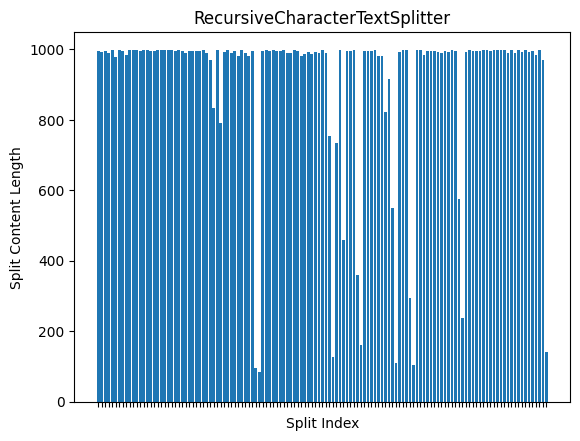

In [33]:
import matplotlib.pyplot as plt

split_lengths = [len(split.page_content) for split in splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.title("RecursiveCharacterTextSplitter")
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.xticks(range(len(split_lengths)), [])
plt.show()

In [34]:
%%time
# 3. Embed & indexing
vectorstore = Chroma.from_documents(
    documents=splits, embedding=UpstageEmbeddings(model="solar-embedding-1-large")
)

CPU times: user 2.73 s, sys: 253 ms, total: 2.98 s
Wall time: 31.8 s


In [35]:
# 4. retrive
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
result_docs = retriever.invoke("What is Bug Classification?")
print(len(result_docs))
print(result_docs[0].page_content[:100])

3
Bugs Are,"<br>Proc. ACM Int'l Symp. Software Testing and Analysis, pp· 86-96,<br>2004.<br>[41] K. Pa


#### SemanticChunker

SemanticChunker is an experimental feature in LangChain that serves to split text into semantically similar chunks.

![Overview](./figures/semantic_chunker.png)

In [36]:
# 2-2. SemanticChunker Split
from langchain_community.utils.math import cosine_similarity
from langchain.docstore.document import Document


def semantic_chunker(
    docs,
    min_chunk_size=100,
    chunk_overlap=10,
    max_chunk_size=1000,
    merge_threshold=0.7,
    embeddings=UpstageEmbeddings(model="solar-embedding-1-large"),
):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=min_chunk_size, chunk_overlap=chunk_overlap
    )
    init_splits = text_splitter.split_documents(docs)
    splits = []

    base_split_text = None
    base_split_emb = None
    for split in init_splits:
        if base_split_text is None:
            base_split_text = split.page_content
            base_split_emb = embeddings.embed_documents([base_split_text])[0]
            continue

        split_emb = embeddings.embed_documents([split.page_content])[0]
        distance = cosine_similarity(X=[base_split_emb], Y=[split_emb])
        if (
            distance[0][0] < merge_threshold
            or len(base_split_text) + len(split.page_content) > max_chunk_size
        ):
            splits.append(Document(page_content=base_split_text))
            base_split_text = split.page_content
            base_split_emb = split_emb
        else:
            base_split_text += split.page_content

    if base_split_text:
        splits.append(Document(page_content=base_split_text))

    return splits

#### HuggingFaceEmbeddings
Since it's just an approximation, it's acceptable to use very light embedding models like KLUE, https://huggingface.co/klue.

In [37]:
%%time
from langchain_community.embeddings import HuggingFaceEmbeddings

hfembeddings = HuggingFaceEmbeddings(model_name="klue/roberta-small")

<timed exec>:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
No sentence-transformers model found with name klue/roberta-small. Creating a new one with mean pooling.
Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-small and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CPU times: user 2.48 s, sys: 933 ms, total: 3.42 s
Wall time: 6.63 s


In [38]:
%%time
semantic_splits = semantic_chunker(docs, merge_threshold=0.8, embeddings=hfembeddings)
print("SemanticChunker Splits:", len(semantic_splits))

SemanticChunker Splits: 242
CPU times: user 1min 10s, sys: 17.9 s, total: 1min 28s
Wall time: 2min 3s


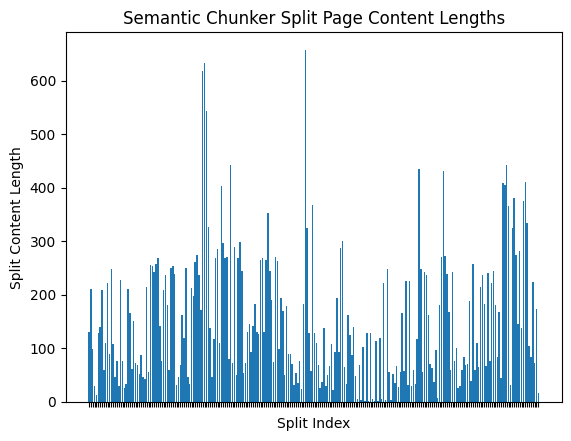

In [39]:
import matplotlib.pyplot as plt

split_lengths = [num_of_tokens(split.page_content) for split in semantic_splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.title("Semantic Chunker Split Page Content Lengths")
plt.xticks(range(len(split_lengths)), [])
plt.show()

### ChromaParallel Class: Parallel Document Embedding
The ChromaParallel class is an extension of the Chroma class to enable parallel processing of document embedding and storage using multiple worker processes.

Chroma is an AI-native open source vector database designed to enhance developer productivity and satisfaction. It is licensed under the Apache 2.0 license. 

- <b> Generate Vectorspace </b> : The `from_documents` class method creates a vector store from a list of documents.

##### Reference

* [Chroma LangChain Documentation](https://python.langchain.com/v0.2/docs/integrations/vectorstores/chroma/)
* [Chroma Official Documentation](https://docs.trychroma.com/getting-started)

In [40]:
import asyncio


class ChromaParallel(Chroma):

    async def afrom_documents(documents, embedding, num_workers=2):
        db = Chroma(embedding_function=embedding)
        # create list of num_workers empty lists
        doc_groups = [[] for _ in range(num_workers)]

        for i in range(len(documents)):
            doc_groups[i % num_workers].append(documents[i])

        tasks = [db.aadd_documents(group) for group in doc_groups]
        await asyncio.gather(*tasks)
        return db

In [41]:
import asyncio
import time

now = time.time()

# 3. Embed & indexing
loop = asyncio.get_event_loop()
semantic_vectorstore = await ChromaParallel.afrom_documents(
    documents=semantic_splits,
    embedding=UpstageEmbeddings(model="solar-embedding-1-large"),
    num_workers=3,
)
semantic_retriever = semantic_vectorstore.as_retriever(search_kwargs={"k": 3})

# 4. retrive
result_docs = semantic_retriever.invoke("What is Bug Classification?")
print(result_docs[1])
print(f"Wall time: {time.time() - now:.2f} sec")

page_content='<h1 id='2' style='font-size:22px'>Classifying Software Changes:<br>Clean or Buggy?</h1><br><p id='3' data-category='paragraph' style='font-size:22px'>Sunghun Kim, E. James Whitehead Jr., Member, IEEE, and Yi Zhang, Member, IEEE</p><p id='4' data-category='paragraph' style='font-size:16px'>Abstract-This paper introduces a new technique for predicting latent software bugs, called change classification. Change<br>classification uses a machine learning classifier to determine whether a new software change is more similar to prior buggy changes or<br>clean changes. In this manner, change classification predicts the existence of bugs in software changes. The classifier is trained using<br>features (in the machine learning sense) extracted from the revision history of a software project stored in its software configuration<br>management repository. The trained classifier can classify changes as buggy or clean, with a 78 percent accuracy and a 60 percent<br>buggy change recall on

In [42]:
# Finally query using RAG
query = "What is bug classification? How it works?"
result_docs = semantic_retriever.invoke(query)

gc_result = chain.invoke({"history": history, "context": result_docs, "input": query})
print(gc_result)

Bug classification is a process in software engineering where bugs or defects in a software system are categorized or grouped based on certain criteria. The purpose of bug classification is to help developers and quality assurance teams better understand the nature and impact of the bugs, prioritize them for fixing, and track their progress.

Bug classification typically involves assigning labels or tags to each bug, such as severity level, priority, component affected, type of issue, and reproducibility. These labels help in organizing and filtering bugs for easier management.

The process of bug classification usually works as follows:

1. Identification: A bug is identified by a developer, tester, or user.
2. Reporting: The bug is reported to the development team, often through a bug tracking system.
3. Triage: The development team triages the bug report to verify its validity and understand the issue.
4. Classification: Based on the information gathered, the bug is assigned appropr

In [43]:
history = [HumanMessage(query), AIMessage(gc_result)]

query = "Why it is good?"
result_docs = semantic_retriever.invoke(query)

gc_result = chain.invoke({"history": history, "context": result_docs, "input": query})
print(gc_result)

Bug classification is beneficial for several reasons:

1. Improved Efficiency: By categorizing bugs, development teams can quickly identify and prioritize the most critical issues, allowing them to focus their efforts on fixing the most impactful bugs first.

2. Better Resource Allocation: With a clear understanding of the nature and impact of each bug, teams can allocate resources more effectively, ensuring that the right people are working on the right issues.

3. Enhanced Collaboration: Bug classification provides a common language and framework for developers, testers, and other stakeholders to discuss and manage bugs. This helps in better communication and collaboration within the team.

4. Increased Transparency: By classifying bugs and making this information available to all team members, everyone can have a clear understanding of the current state of the software and the progress being made in resolving issues.

5. Improved Quality: By addressing bugs systematically and priori

### For an in-depth look at the different types of RAG, please refer to the files '09. Smart RAG' and '10. Tool_RAG'.

- [09. Smart RAG.ipynb](https://github.com/UpstageAI/cookbook/blob/main/cookbooks/upstage/Solar-Full-Stack-LLM-101/09_Smart_RAG.ipynb)
- [10. Tool_RAG.ipynb](https://github.com/UpstageAI/cookbook/blob/main/cookbooks/upstage/Solar-Full-Stack-LLM-101/10_tool_RAG.ipynb)

## [Session 5] Gradio

<b> Comprehensive RAG System for PDFs </b> : Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

In [44]:
!pip install -qU gradio python-dotenv langchain-upstage python-dotenv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [45]:
import gradio as gr

from langchain_upstage import (
    ChatUpstage,
    UpstageEmbeddings,
    UpstageLayoutAnalysisLoader,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain.schema import AIMessage, HumanMessage
from langchain_text_splitters import (
    Language,
    RecursiveCharacterTextSplitter,
)
from langchain_chroma import Chroma

llm = ChatUpstage(streaming=True)

In [46]:
# More general chat
chat_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{message}"),
    ]
)

In [47]:
chain = chat_with_history_prompt | llm | StrOutputParser()

In [48]:
def chat(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    return chain.invoke({"message": message, "history": history_langchain_format})

In [49]:
with gr.Blocks() as demo:
    chatbot = gr.ChatInterface(
        chat,
        examples=[
            "How to eat healthy?",
            "Best Places in Korea",
            "How to make a chatbot?",
        ],
        title="Solar Chatbot",
        description="Upstage Solar Chatbot",
    )
    chatbot.chatbot.height = 300

In [50]:
if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


## 🚀 Building Your Own AI-Powered Chatbot! 🤖


Congratulations on completing the course on building chatbots using Language Models (LLMs), Layout Analysis (LA), custom tools, and Groundedness Checks (GC)! Now, showcase your brilliant ideas by participating in a hackathon and leveraging the Solar API! 🚀